In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [46]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [47]:
#Cantidad de columnas
print(f'Cantidad de columnas del dataframe: {len(df.columns)}')

Cantidad de columnas del dataframe: 19


In [48]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [49]:
#Columna tiempo de manejo en minutos
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta('1m')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [50]:
#Desviacion Standar
print(f'Desviacion Standar de tiempo de conduccion: {df.duration.std()}')

Desviacion Standar de tiempo de conduccion: 42.59435124195458


count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64


<Axes: >

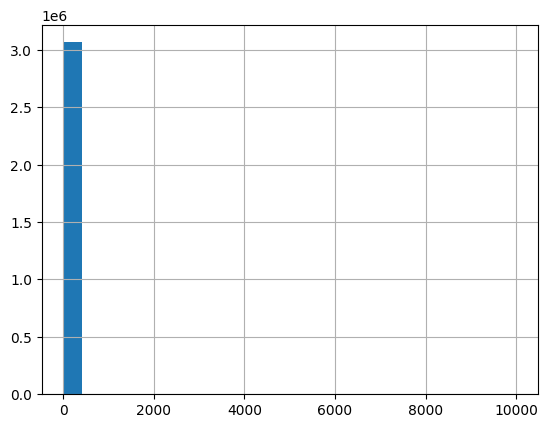

In [51]:
#outliers
print(df['duration'].describe())
df['duration'].hist(bins=20, rwidth=0.8)

In [52]:
#Quitando Outliers
after_dropping_outlier = ((df.duration >= 1) & (df.duration <= 60)).mean()
df = df[(df.duration >= 1) & (df.duration <= 60)]
print(f'Fraccion de registros luego de quitar outliers: {after_dropping_outlier}')


Fraccion de registros luego de quitar outliers: 0.9812202822125979


<Axes: >

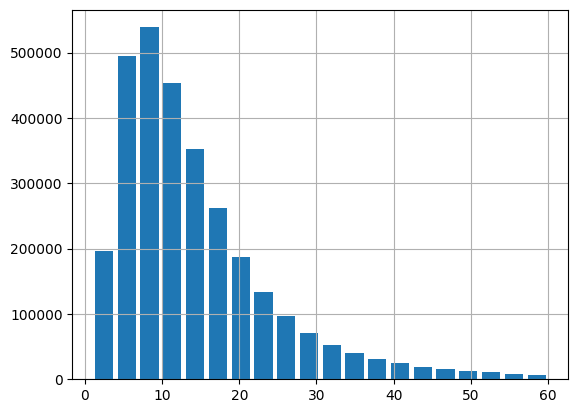

In [53]:
#historgrama
df['duration'].hist(bins=20, rwidth=0.8)

In [54]:
#one Hot encoding
categorical = ['PULocationID','DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(f"Columnas luego de ejecutar Vectorizer: {X_train.shape[1]}")

Columnas luego de ejecutar Vectorizer: 515


In [55]:
target = 'duration'
y_train = df[target].values

/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE Train: 7.649261822035489


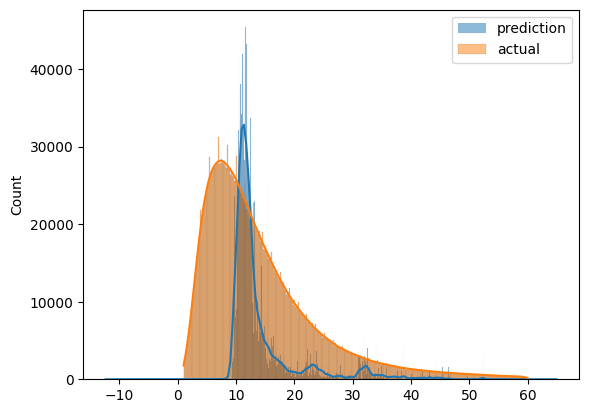

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

#MSE
y_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE Train: {rmse_train}')
#RESULTADOS
sns.histplot(y_pred, label='prediction', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend(); plt.show()

In [57]:
# Funcion para transformar la data
def transform(filename):
    # Carga
    df = pd.read_parquet(filename)
    
    # Limpieza - trasnformacion
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta('1m')
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [58]:
df_train = transform('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = transform('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [59]:
# Tamaño
len(df_train), len(df_val)

(3009173, 2855951)

In [60]:
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical].to_dict(orient='records')
X_valid = dv.transform(val_dicts)

In [61]:
target = 'duration'
y_train = df_train[target].values
y_valid = df_val[target].values

In [62]:
# Modelo de regresion
lr = LinearRegression()
lr.fit(X_train, y_train)

# Resumen
y_pred_train = lr.predict(X_train)
y_pred_valid = lr.predict(X_valid)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f'MSE Train: {rmse_train}')
print(f'MSE Valid: {rmse_valid}')

MSE Train: 7.649261822035489
MSE Valid: 7.811821332387183


/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/leo-unix/leo_workspace/mlops_data_talks_club/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
with open('model.bin','wb') as f_out:
    pickle.dump((dv,lr), f_out)